# SABR Model Test Code

In [5]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [6]:
### only run this when you changed the class definition
CODE_CHANGED = False
if( CODE_CHANGED ):
    imp.reload(opt)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [7]:
# Parameters
strike = np.linspace(75,125,num=25)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1

In [8]:
# Create model
sabr_bsm = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr_bsm.__dict__

{'alpha': 0.3,
 'beta': 1,
 'bsm_model': <option_models.bsm.Model at 0x98fc5c0>,
 'divr': 0,
 'intr': 0,
 'rho': 0.25,
 'sigma': 0.2,
 'texp': 1}

In [9]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward)
bsm_vol = sabr_bsm.bsm_vol(strike, forward)

price, bsm_vol

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([0.19740451, 0.19730124, 0.19731138, 0.19742763, 0.19764276,
        0.19794962, 0.19834124, 0.19881083, 0.19935186, 0.19995804,
        0.2006234 , 0.20134229, 0.20210938, 0.20291966, 0.2037685 ,
        0.20465155, 0.20556483, 0.20650464, 0.2074676 , 0.20845059,
        0.20945078, 0.21046559, 0.21149265, 0.21252984, 0.21357521]))

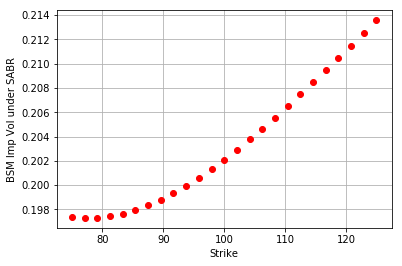

In [10]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [15]:
# implied vol (sigma in this case)
# you should get back the original sigma
sabr_bsm.impvol(price[11], strike[11], forward)

0.19999999999936008

### (2) SABR for $\beta=0$

In [11]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25
beta = 0

In [12]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

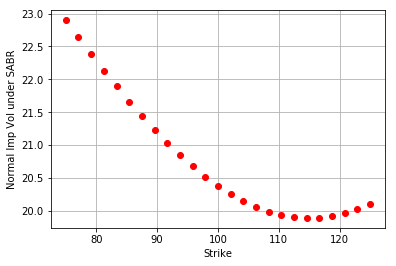

In [13]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [14]:
sabr_norm = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr_norm.__dict__

{'alpha': 0.5,
 'beta': 0.0,
 'divr': 0,
 'intr': 0,
 'normal_model': <option_models.normal.Model at 0x98fcb38>,
 'rho': -0.25,
 'sigma': 20,
 'texp': 1}

In [15]:
price = sabr_norm.price(strike, forward)
norm_vol = sabr_norm.norm_vol(strike, forward)
price, norm_vol

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([22.898288  , 22.63620745, 22.38073263, 22.1326082 , 21.89263645,
        21.66167534, 21.44063425, 21.2304669 , 21.03216098, 20.84672415,
        20.67516621, 20.5184775 , 20.37760417, 20.25342105, 20.1467038 ,
        20.05810179, 19.98811408, 19.93707021, 19.9051177 , 19.89221722,
        19.89814614, 19.92250965, 19.9647587 , 20.02421277, 20.10008575]))

In [16]:
# implied vol (e.g. sigma)
sabr_norm.impvol(price[11], strike[11], forward)

19.999999999999922

### (3) Smile calibration to 3 options

In [22]:
strike3 = np.array([90, 100, 110])
price3 = sabr_norm.price(strike3, forward)
norm_vol3 = sabr_norm.norm_vol(strike3, forward)

price3, norm_vol3

(array([ 14.37778096,   8.12948788,   3.9368394 ]),
 array([ 21.18982474,  20.37760417,  19.94575372]))

In [23]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(norm_vol3, strike3, forward, is_vol=True)

(0, 0, 0)

In [24]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

(0, 0, 0)

Below is same for sabr_bsm

In [25]:
strike3 = np.array([90, 100, 110])
price3 = price = sabr_bsm.price(strike3, forward)
bsm_vol3 = sabr_bsm.bsm_vol(strike3, forward)

price3, bsm_vol3

(array([ 13.55352055,   8.0492952 ,   4.52747026]),
 array([ 0.19891353,  0.20210938,  0.20631472]))

In [26]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(bsm_vol3, strike3, forward, is_vol=True)

(0, 0, 0)

In [27]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

(0, 0, 0)

## 2. Pricing under MC method

In [31]:
strike = np.linspace(75,125,num=25)
forward = 100

In [41]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                  alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'divr': 0, 'alpha': 0.3, 'bsm_model': <option_models.bsm.Model object at 0x000001CA0D2C85C0>, 'intr': 0, 'texp': 1, 'sigma': 0.2, 'beta': 1, 'rho': 0.25}


In [42]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([ 25.54990056,  23.6710906 ,  21.84772723,  20.08808242,
         18.39998119,  16.79046024,  15.26547396,  13.82967094,
         12.48625486,  11.23693323,  10.08194855,   9.0201795 ,
          8.0492952 ,   7.16594441,   6.36596195,   5.64457698,
          4.99661108,   4.41665739,   3.8992357 ,   3.43892089,
          3.03044477,   2.66877274,   2.34915782,   2.06717523,   1.81874082]),
 0)

Repeat the same for beta = 0

In [43]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.texp, sabr_norm.sigma, 
                                   alpha=sabr_norm.alpha, rho=sabr_norm.rho, beta=sabr_norm.beta)

{'divr': 0, 'alpha': 0.5, 'normal_model': <option_models.normal.Model object at 0x000001CA0D6E6390>, 'intr': 0, 'texp': 1, 'sigma': 20, 'beta': 0.0, 'rho': -0.25}


In [44]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([ 26.59695921,  24.75853528,  22.95673964,  21.19638261,
         19.4826555 ,  17.82107839,  16.21741812,  14.67757267,
         13.20742012,  11.81263312,  10.49846428,   9.26951283,
          8.12948788,   7.08098803,   6.12531972,   5.26237563,
          4.49059068,   3.80698489,   3.20729256,   2.68616625,
          2.23743499,   1.85439056,   1.53007481,   1.2575435 ,   1.03008923]),
 0)

## 3. Pricing under conditional MC method

In [31]:
strike = np.linspace(75,125,num=25)
forward = 100

In [46]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                       alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'divr': 0, 'alpha': 0.3, 'bsm_model': <option_models.bsm.Model object at 0x000001CA0D2C85C0>, 'intr': 0, 'texp': 1, 'sigma': 0.2, 'beta': 1, 'rho': 0.25}


In [47]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_cmc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([ 25.54990056,  23.6710906 ,  21.84772723,  20.08808242,
         18.39998119,  16.79046024,  15.26547396,  13.82967094,
         12.48625486,  11.23693323,  10.08194855,   9.0201795 ,
          8.0492952 ,   7.16594441,   6.36596195,   5.64457698,
          4.99661108,   4.41665739,   3.8992357 ,   3.43892089,
          3.03044477,   2.66877274,   2.34915782,   2.06717523,   1.81874082]),
 0)

Repeat the same for beta = 0

In [50]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelBsmCondMC(sabr_norm.texp, sabr_norm.sigma, alpha=sabr_norm.alpha, 
                                        rho=sabr_norm.rho, beta=sabr_norm.beta)

{'divr': 0, 'alpha': 0.5, 'normal_model': <option_models.normal.Model object at 0x000001CA0D6E6390>, 'intr': 0, 'texp': 1, 'sigma': 20, 'beta': 0.0, 'rho': -0.25}


In [51]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_cmc.price(strike, forward)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([ 26.59695921,  24.75853528,  22.95673964,  21.19638261,
         19.4826555 ,  17.82107839,  16.21741812,  14.67757267,
         13.20742012,  11.81263312,  10.49846428,   9.26951283,
          8.12948788,   7.08098803,   6.12531972,   5.26237563,
          4.49059068,   3.80698489,   3.20729256,   2.68616625,
          2.23743499,   1.85439056,   1.53007481,   1.2575435 ,   1.03008923]),
 0)

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed